# Analytical methods for financial data analysis

In [1]:
# LOAD PACKAGES SUPRESS WARNINGS
library(xts)
library(tidyverse)
library(lubridate)
library(forecast)

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::first()  masks xts::first()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::last()   masks xts::last()

Attaching package: ‘lubridate’

The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


In [4]:
# Read the kraken_clean.csv file a kraken_df
kraken_df = read_csv("data/kraken_clean.csv")
head(kraken_df)

Parsed with column specification:
cols(
  datetime = col_datetime(format = ""),
  crypto = col_character(),
  pct_change = col_double(),
  price = col_double(),
  volume = col_double(),
  trend = col_double(),
  all_time_high = col_double(),
  new_crypto = col_double(),
  date = col_date(format = ""),
  time = col_time(format = "")
)


datetime,crypto,pct_change,price,volume,trend,all_time_high,new_crypto,date,time
2020-08-05 03:48:49,XBT,0.0040,11194.0000,111100000,-1,0,0,2020-08-05,03:48:49
2020-08-05 03:48:49,ETH,0.0080,389.8100,68800000,1,0,0,2020-08-05,03:48:49
2020-08-05 03:48:49,XRP,0.0320,0.3010,20300000,-1,0,0,2020-08-05,03:48:49
2020-08-05 03:48:49,USDT,0.0001,1.0005,18600000,-1,0,0,2020-08-05,03:48:49
2020-08-05 03:48:49,LINK,0.0650,9.8602,14800000,1,0,0,2020-08-05,03:48:49
2020-08-05 03:48:49,XTZ,0.0540,3.2424,10300000,1,0,0,2020-08-05,03:48:49


In [5]:
# XBT crypto Aanlysis from dataset
xbt_df = kraken_df[kraken_df$crypto == "XBT",]
xbt_xts = xts(select(xbt_df,-c("crypto","datetime","date","time")), 
             order.by = as.POSIXct(strptime(xbt_df$date,"%Y-%m-%d")))
daily_price = xbt_xts[,'price']
weekly_price = apply.weekly(daily_price, mean)
monthly_price = apply.monthly(daily_price, mean)
quarterly_price = apply.quarterly(daily_price, mean)

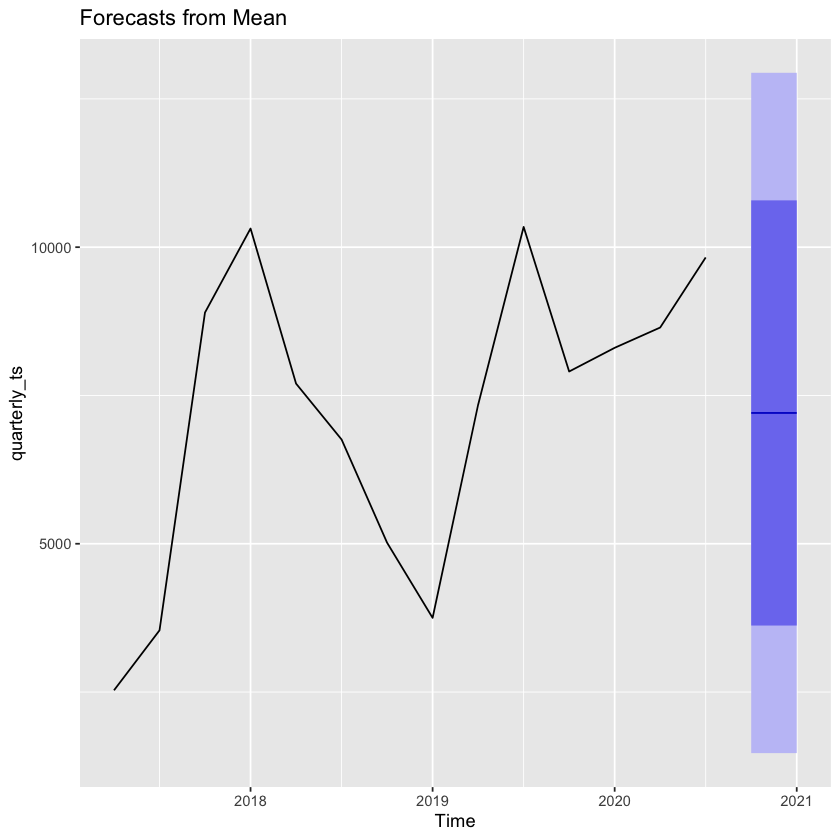

In [6]:
# Get the quarterly data analysis done
xbt_start = quarterly_price[1]
xbt_start = c(year(xbt_start), quarter(xbt_start))
quarterly_ts = ts(quarterly_price, start = xbt_start, frequency = 4)
xbt.fcast = meanf(y = quarterly_ts, h = 2) # Forecast
autoplot(xbt.fcast)

Parsed with column specification:
cols(
  date = col_character(),
  open = col_double(),
  high = col_double(),
  low = col_double(),
  close = col_double()
)


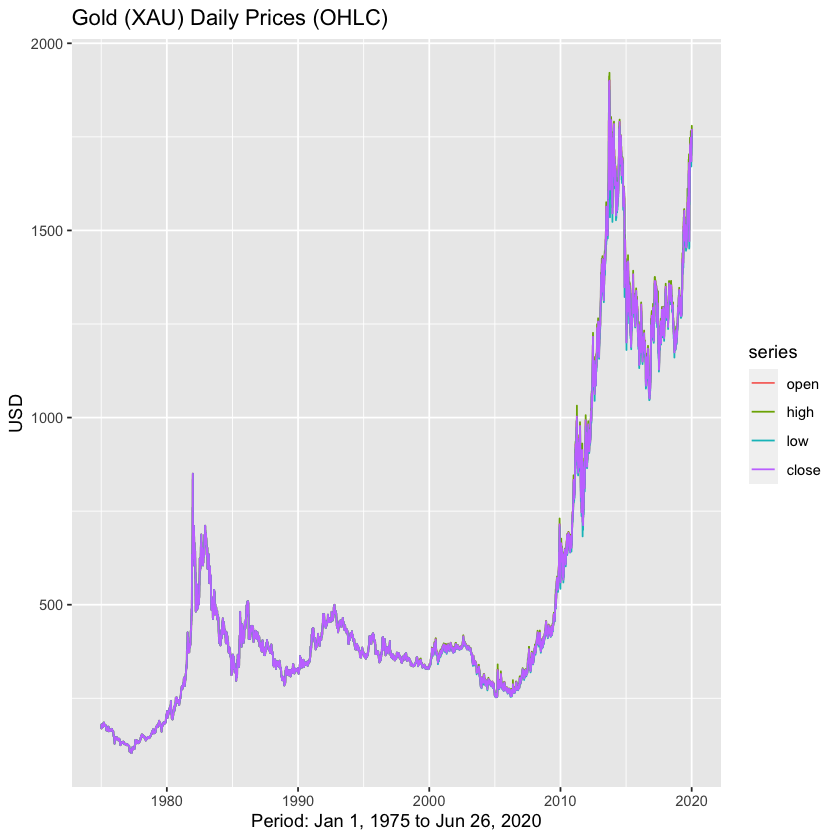

In [9]:
#Exponential Smoothing - `ses` function for xau crypta data
xau_df = read_csv("data/XAU_USD.csv")
xau_df$date = as.Date(xau_df$date, format = "%m/%d/%y")
xau_xts = xts(select(xau_df,-c("date")), order.by = as.POSIXct(strptime(xau_df$date,"%Y-%m-%d")))
xau_start = c(year(xau_df$date[length(xau_df$date)]), month(xau_df$date[length(xau_df$date)]))
xau_end = c(year(xau_df$date[1]), month(xau_df$date[1]))
xau_ts = ts(data = xau_xts, start = xau_start, end = xau_end, frequency = 365)
autoplot(xau_ts, facets = FALSE) + ggtitle("Gold (XAU) Daily Prices (OHLC)") + 
    xlab("Period: Jan 1, 1975 to Jun 26, 2020") + ylab("USD")

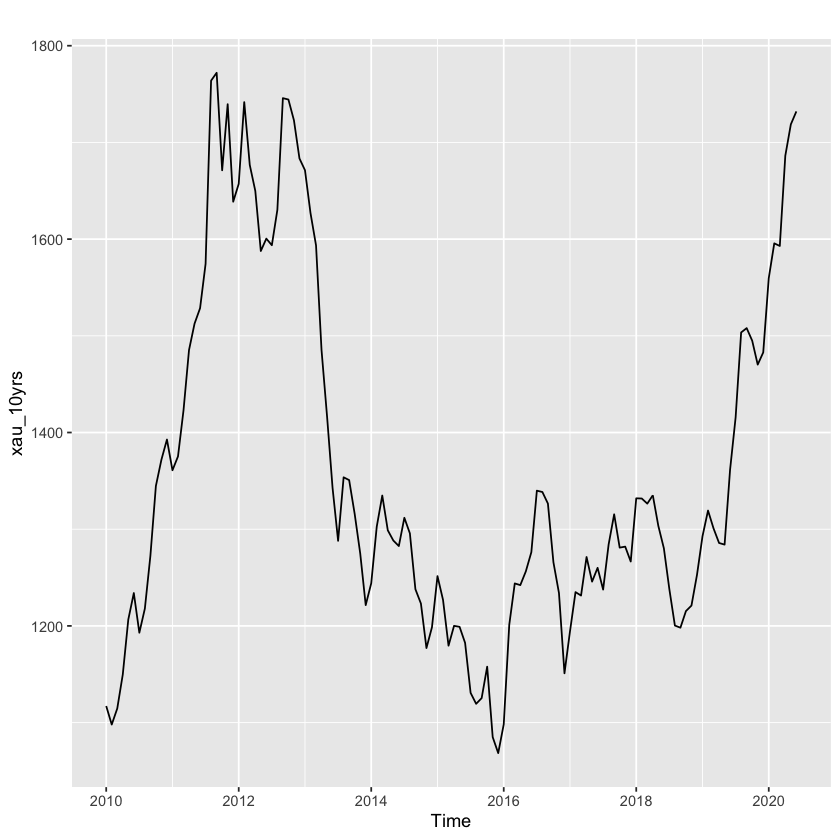

In [11]:
xau_10 = apply.monthly(xau_xts[,'close'], mean)["2010-01-01/2020-06-26"]
start_date = index(xau_10)[1]
end_date = index(xau_10[length(xau_10)])
xau_start = c(year(start_date), month(start_date))
xau_end = c(year(end_date), month(end_date))
xau_10yrs = ts(data = xau_10, start = xau_start, end = xau_end, frequency = 12)
autoplot(xau_10yrs)


Forecast method: Simple exponential smoothing

Model Information:
Simple exponential smoothing 

Call:
 ses(y = xau_10yrs, h = 6, level = c(80, 95), alpha = 0.9) 

  Smoothing parameters:
    alpha = 0.9 

  Initial states:
    l = 1115.4531 

  sigma:  48.7837

     AIC     AICc      BIC 
1590.979 1591.077 1596.652 

Error measures:
                   ME   RMSE      MAE       MPE     MAPE      MASE      ACF1
Training set 5.422087 48.395 37.72357 0.3223015 2.740707 0.2330402 0.3182635

Forecasts:
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jul 2020       1730.318 1667.799 1792.837 1634.703 1825.932
Aug 2020       1730.318 1646.207 1814.428 1601.682 1858.954
Sep 2020       1730.318 1629.122 1831.513 1575.552 1885.083
Oct 2020       1730.318 1614.531 1846.104 1553.238 1907.398
Nov 2020       1730.318 1601.584 1859.052 1533.436 1927.200
Dec 2020       1730.318 1589.824 1870.811 1515.451 1945.184


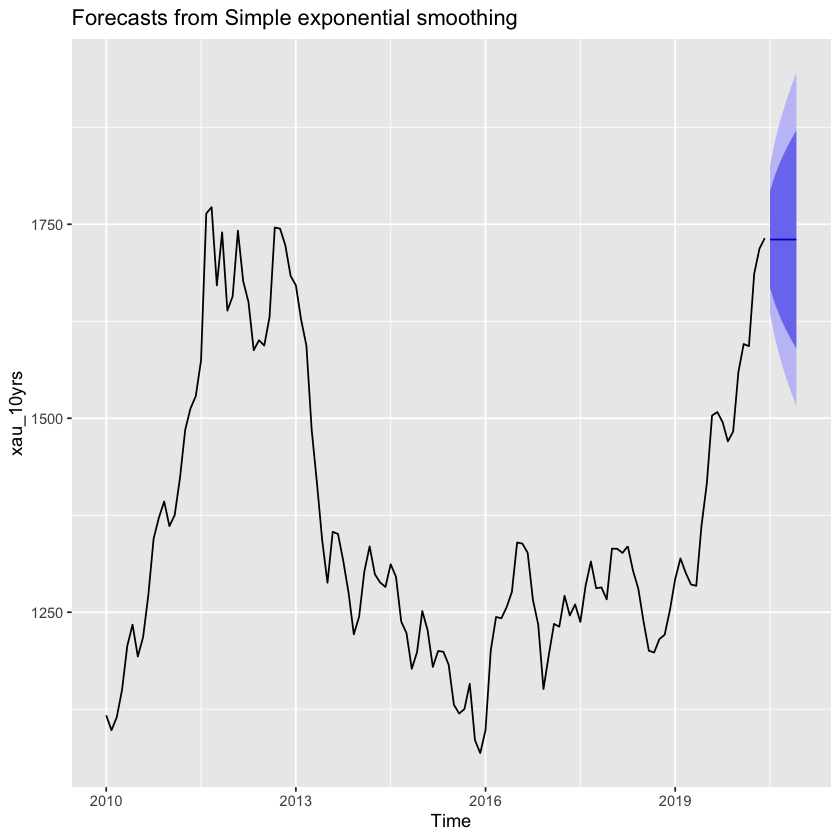

In [15]:
xau_ses_09 = ses(y = xau_10yrs,
                 h = 6,
                 level = c(80, 95),
                 alpha = 0.9)
summary(xau_ses_09)
autoplot(xau_ses_09)


Forecast method: Holt's method

Model Information:
Holt's method 

Call:
 holt(y = xau_10yrs, h = 6) 

  Smoothing parameters:
    alpha = 0.9999 
    beta  = 0.0819 

  Initial states:
    l = 1063.4473 
    b = 26.8443 

  sigma:  47.579

     AIC     AICc      BIC 
1588.629 1589.129 1602.811 

Error measures:
                     ME    RMSE      MAE         MPE     MAPE     MASE     ACF1
Training set -0.4093449 46.8177 35.73522 -0.02382129 2.598869 0.220757 0.155896

Forecasts:
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jul 2020       1754.698 1693.723 1815.673 1661.445 1847.951
Aug 2020       1777.319 1687.492 1867.146 1639.940 1914.698
Sep 2020       1799.940 1685.469 1914.410 1624.872 1975.007
Oct 2020       1822.561 1685.187 1959.935 1612.466 2032.656
Nov 2020       1845.182 1685.736 2004.627 1601.330 2089.033
Dec 2020       1867.802 1686.674 2048.931 1590.790 2144.815


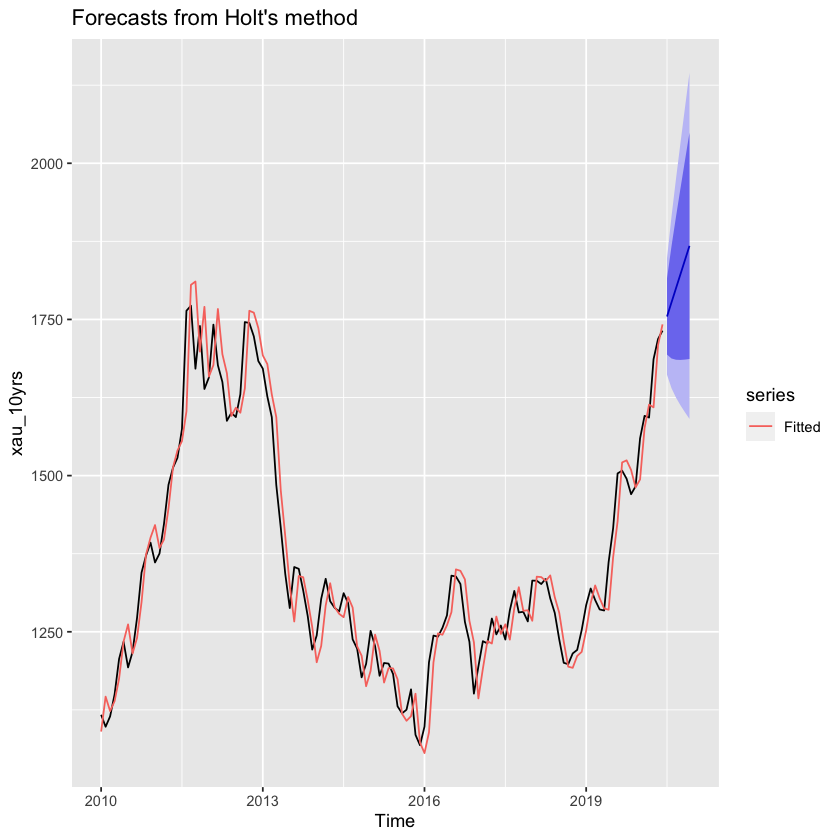

In [17]:
# Holt method with h = 6
holt_06 = holt(xau_10yrs, h = 6)
summary(holt_06)
autoplot(holt_06) + autolayer(fitted(holt_06), series = "Fitted")

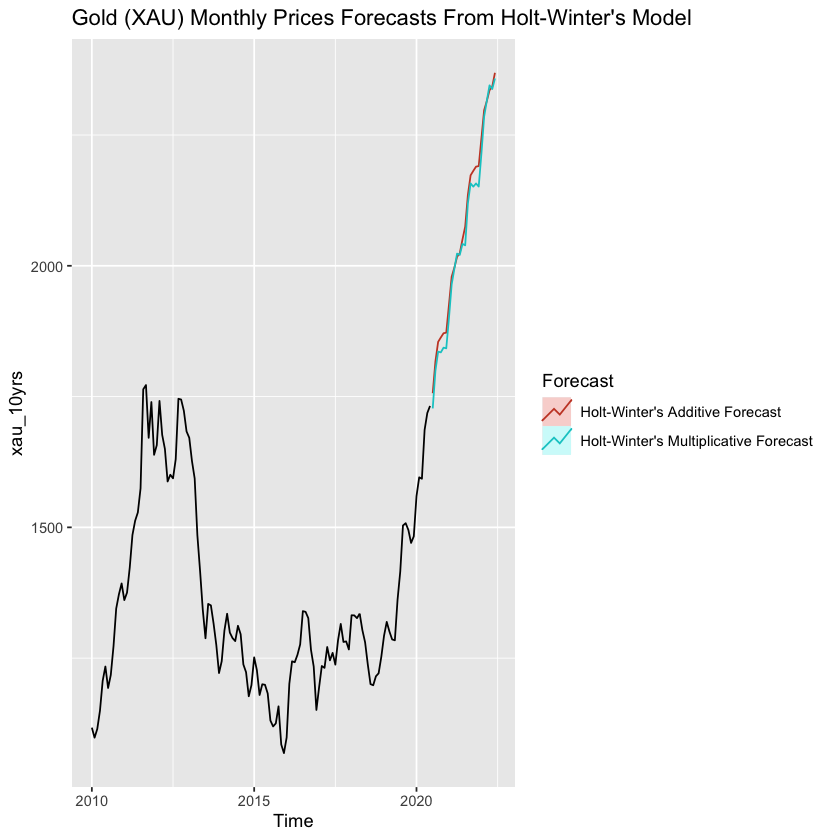

In [19]:
# Additive Holt-Winter method
xau_hw01 = hw(xau_10yrs, seasonal = "additive")
# Multiplicative Holt-Winter method
xau_hw02 = hw(xau_10yrs, seasonal = "multiplicative")
# Plot the timeseries, Holt-Winter additive and multiplicative method
autoplot(xau_10yrs) +
    autolayer(xau_hw01, series = "Holt-Winter's Additive Forecast", PI = FALSE) + 
    autolayer(xau_hw02, series = "Holt-Winter's Multiplicative Forecast", PI = FALSE) +
    ggtitle("Gold (XAU) Monthly Prices Forecasts From Holt-Winter's Model") + 
    guides(colour = guide_legend(title="Forecast"))

Parsed with column specification:
cols(
  date = col_character(),
  open = col_double(),
  high = col_double(),
  low = col_double(),
  close = col_double()
)


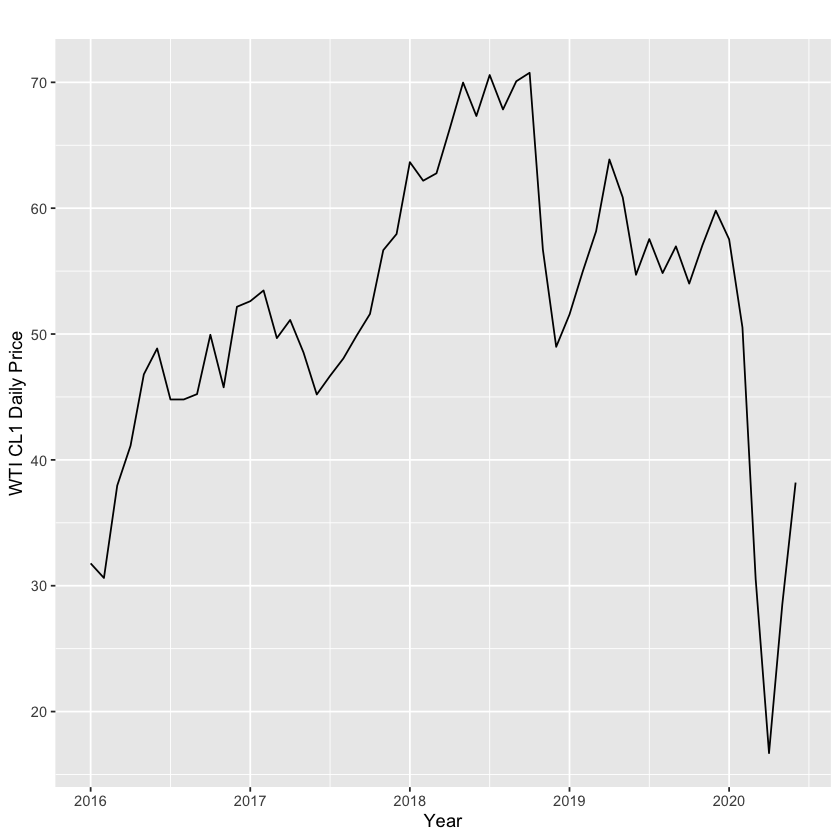

In [22]:
wti_df = read_csv("data/WTI_CL1.csv")
wti_df$date = as.Date(wti_df$date, format = "%m/%d/%y")
wti_xts = xts(select(wti_df,-c("date")), order.by = as.POSIXct(strptime(wti_df$date,"%Y-%m-%d")))
wti_05 = apply.monthly(wti_xts[,'close'], mean)["2016-01-01/2020-06-26"]
start_date = index(wti_05)[1]
end_date = index(wti_05[length(wti_05)])
wti_start = c(year(start_date), month(start_date))
wti_end = c(year(end_date), month(end_date))
wti_5yrs = ts(data = wti_05, start = wti_start, end = wti_end, frequency = 12)
autoplot(wti_5yrs, ylab = "WTI CL1 Daily Price", xlab = "Year")

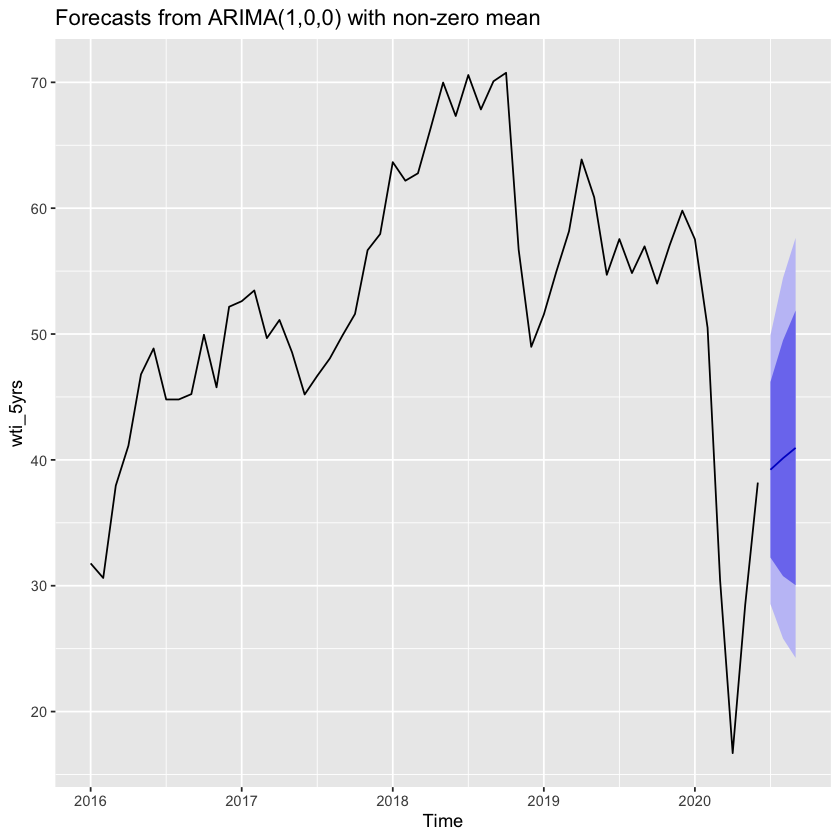

In [23]:
# AR(1) Model on 5 years WTI CL1 monthly prices 
ar01_fit = arima(wti_5yrs, order = c(1,0,0))
# Forecast 3 periods into the future
forward = forecast(ar01_fit, h = 3)
# Plot the model
autoplot(forward)